# LeNet Lab Solution
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
import cv2

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
import numpy as np

The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

12


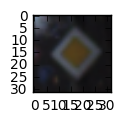

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index]

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [6]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [7]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

In [40]:
def image_rotate(image, angle):
    rows,cols = image.shape[:2]
    rmat = cv2.getRotationMatrix2D((cols/2, rows/2), np.random.uniform(-angle, angle), 1.0)
    img_rot = cv2.warpAffine(image , rmat, (cols,rows))
    return img_rot

def image_translate(image, tvalue):
    rows,cols = image.shape[:2]
    rx, ry = np.random.uniform(-tvalue, tvalue, 2)
    tmat = np.float32([[1,0,rx],[0,1,ry]])
    trans_image = cv2.warpAffine(image, tmat, (cols,rows))
    return trans_image

def image_hsv(image, v_value):
    rows,cols = image.shape[:2]
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v += v_value
    final_hsv = cv2.merge((h, s, v))
    final_img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return final_img

In [9]:
bin_count = np.bincount(y_train)
print(bin_count)

[ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]


In [29]:
for i in range(43):
    print(bin_count[i])
    final_list, final_y = [], []
    add_more = 2600 - bin_count[i]
    new_indices = np.where(y_train == i)
    num_indices = len(new_indices[0])
    print(num_indices)
    for j in range(add_more):
        rand_ind = np.random.randint(num_indices)
        temp_image_rot = image_rotate(X_train[new_indices[0][rand_ind]], 10)
        final_transform = image_translate(temp_image_rot, 5)
        #final_image = np.expand_dims(final_transform, axis = 2)
        final_list.append(final_transform)
        final_y.append(i)
    X_train = np.append(X_train, final_list, axis = 0)
    y_train = np.append(y_train, final_y, axis = 0)

210
210
2220
2220
2250
2250
1410
1410
1980
1980
1860
1860
420
420
1440
1440
1410
1410
1470
1470
2010
2010
1320
1320
2100
2100
2160
2160
780
780
630
630
420
420
1110
1110
1200
1200
210
210
360
360
330
330
390
390
510
510
270
270
1500
1500
600
600
240
240
540
540
270
270
450
450
780
780
240
240
689
689
420
420
1200
1200
390
390
210
210
2070
2070
300
300
360
360
240
240
240
240


In [31]:
bin_count = np.bincount(y_train)
print(bin_count)

[2600 2600 2600 2600 2600 2600 2600 2600 2600 2600 2600 2600 2600 2600 2600
 2600 2600 2600 2600 2600 2600 2600 2600 2600 2600 2600 2600 2600 2600 2600
 2600 2600 2600 2600 2600 2600 2600 2600 2600 2600 2600 2600 2600]


In [74]:
temp_image_rot = image_rotate(X_train[index], 5)
temp_transform = image_translate(temp_image_rot, 5)
final_image = image_hsv(temp_transform, 20)
final_image.shape

(32, 32, 3)

In [75]:
temp_X = X_train[0:10]
temp_X.shape

(10, 32, 32, 3)

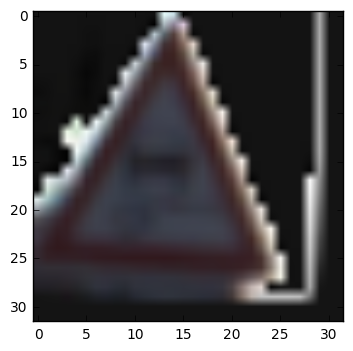

In [76]:
plt.imshow(final_image)
#plt.imshow(temp_transform)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
temp_init = X_train[1]
rand_ind = np.random.randint(bin_count[0])
temp_image_rot = image_rotate(X_train[rand_ind], 20)
temp_mat = []
temp_mat.append(temp_image_rot)
new_mat = np.append(temp_init, [temp_mat], axis = 0)

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [84]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x16.
    conv1_W_1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 16), mean = mu, stddev = sigma))
    conv1_b_1 = tf.Variable(tf.zeros(16))
    conv1_1   = tf.nn.conv2d(x, conv1_W_1, strides=[1, 1, 1, 1], padding='SAME') + conv1_b_1

    # SOLUTION: Activation.
    conv1_1 = tf.nn.relu(conv1_1)
    
    # SOLUTION: Layer 2: Convolutional. Input = 32x32x16. Output = 32x32x16.
    conv1_W_2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 16), mean = mu, stddev = sigma))
    conv1_b_2 = tf.Variable(tf.zeros(16))
    conv1_2   = tf.nn.conv2d(conv1_1, conv1_W_2, strides=[1, 1, 1, 1], padding='SAME') + conv1_b_2
    
    # SOLUTION: Activation.
    conv1_2 = tf.nn.relu(conv1_2)
    
    # SOLUTION: Layer 3: Convolutional. Input = 32x32x16. Output = 28x28x16.
    conv1_W_3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 16), mean = mu, stddev = sigma))
    conv1_b_3 = tf.Variable(tf.zeros(16))
    conv1_3   = tf.nn.conv2d(conv1_2, conv1_W_3, strides=[1, 1, 1, 1], padding='VALID') + conv1_b_3
    
    # SOLUTION: Activation.
    conv1_p = tf.nn.relu(conv1_3)

    # SOLUTION: Pooling. Input = 28x28x16. Output = 14x14x16.
    conv1 = tf.nn.max_pool(conv1_p, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 4: Convolutional. Input = 14x14x16 Output = 10x10x16.
    conv2_W_1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 16), mean = mu, stddev = sigma))
    conv2_b_1 = tf.Variable(tf.zeros(16))
    conv2_1   = tf.nn.conv2d(conv1, conv2_W_1, strides=[1, 1, 1, 1], padding='VALID') + conv2_b_1
    
    # SOLUTION: Activation.
    conv2_1 = tf.nn.relu(conv2_1)
    
    # SOLUTION: Layer 5: Convolutional. Input = 10x10x16. Output = 10x10x16.
    conv2_W_2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 16), mean = mu, stddev = sigma))
    conv2_b_2 = tf.Variable(tf.zeros(16))
    conv2_2   = tf.nn.conv2d(conv2_1, conv2_W_2, strides=[1, 1, 1, 1], padding='SAME') + conv2_b_2
    # SOLUTION: Activation.
    conv2_2 = tf.nn.relu(conv2_2)
    
    # SOLUTION: Layer 5: Convolutional. Input = 10x10x16. Output = 10x10x16.
    conv2_W_3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 16), mean = mu, stddev = sigma))
    conv2_b_3 = tf.Variable(tf.zeros(16))
    conv2_3   = tf.nn.conv2d(conv2_2, conv2_W_3, strides=[1, 1, 1, 1], padding='SAME') + conv2_b_3
    # SOLUTION: Activation.
    conv2_3 = tf.nn.relu(conv2_3)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2_3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [85]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [86]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [87]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))